In [1]:
import wave_timing.calc as wtc
import wave_timing.utils as wtu
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Add calculation of time delay to compare to results from x_corr
time = np.arange(0, 3.5, 6.67e-6)
v12_actual_delay = 0.02
v34_actual_delay = 0.004
freq = 10
dv1 = np.sin(freq * 2 * np.pi * time)
dv2 = np.sin(freq * 2 * np.pi * (time + v12_actual_delay))
dv3 = np.sin(freq * 2 * np.pi * time)
dv4 = np.sin(freq * 2 * np.pi * (time + v34_actual_delay))

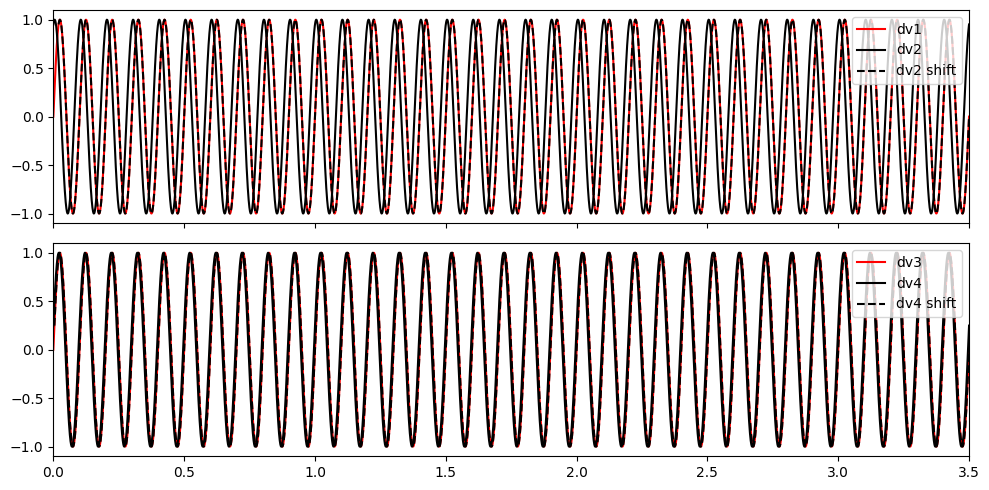

In [3]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 5))

ax[0].plot(time, dv1, 'r', label='dv1')
ax[0].plot(time, dv2, 'k', label='dv2')
ax[0].plot(time + v12_actual_delay, dv2, '--k', label='dv2 shift')
ax[0].legend(loc='upper right')

ax[1].plot(time, dv3, 'r', label='dv3')
ax[1].plot(time, dv4, 'k', label='dv4')
ax[1].plot(time + v34_actual_delay, dv4, '--k', label='dv4 shift')
ax[1].legend(loc='upper right')
ax[1].set_xlim(0, 3.5)

plt.tight_layout()

In [4]:
X_corr = wtc.cross_correlation(dv1, dv2, dv3, dv4, time)
start = 0.0
end = 3.5
xmax, correlation, __ = X_corr.x_corr(start=start, end=end)
dt = X_corr.dt
delay_12, delay_34 = xmax * dt

print(f'V1-2 Actual Delay: {v12_actual_delay}')
print(f'V1-2 Calculated Delay: {round(delay_12, 4)}')
print(f'V3-4 Actual Delay: {v34_actual_delay}')
print(f'V3-4 Calculated: {round(delay_34, 4)}')

V1-2 Actual Delay: 0.02
V1-2 Calculated Delay: 0.0199
V3-4 Actual Delay: 0.004
V3-4 Calculated: 0.004


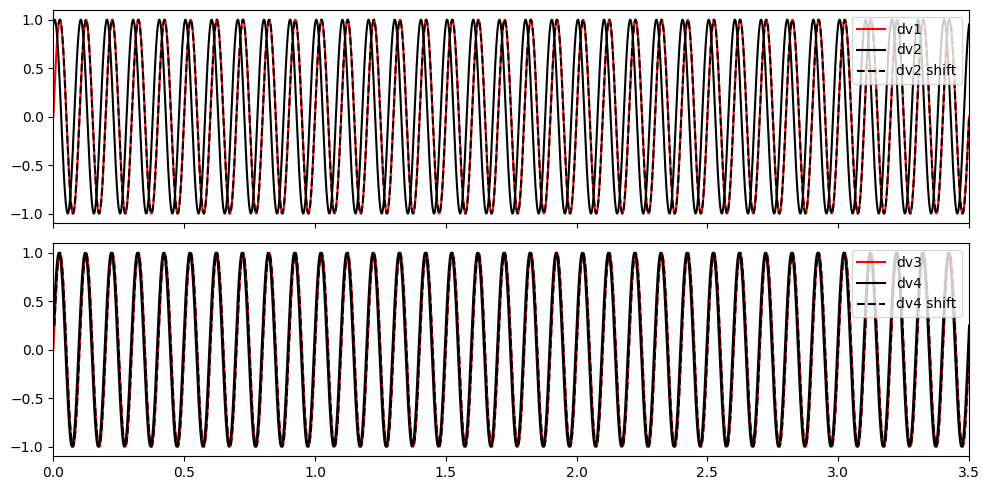

In [5]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 5))

ax[0].plot(X_corr.time, X_corr.wave1, 'r', label='dv1')
ax[0].plot(X_corr.time, X_corr.wave2, 'k', label='dv2')
ax[0].plot(X_corr.time + delay_12, X_corr.wave2, '--k', label='dv2 shift')
ax[0].legend(loc='upper right')

ax[1].plot(X_corr.time, X_corr.wave3, 'r', label='dv3')
ax[1].plot(X_corr.time, X_corr.wave4, 'k', label='dv4')
ax[1].plot(X_corr.time + delay_34, X_corr.wave4, '--k', label='dv4 shift')
ax[1].legend(loc='upper right')
ax[1].set_xlim(0, 3.5)

plt.tight_layout()

In [6]:
X_corr = wtc.cross_correlation(dv1, dv2, dv3, dv4, time)
delay, corr_max, frequency = X_corr.find_delay(start=start, end=end)

In [7]:
print(f'V1-2 Actual Delay: {v12_actual_delay}')
print(f'V1-2 Calculated Delay: {round(delay[0], 4)}')
print(f'V1-2 Corr Coef: {round(corr_max[0], 4)}')
print(f'V1-2 Actual Frequency: {freq}')
print(f'V1-2 Calculated Frequency: {round(frequency[0], 4)}')
print('\n')
print(f'V3-4 Actual Delay: {v12_actual_delay}')
print(f'V3-4 Calculated Delay: {round(delay[1], 4)}')
print(f'V3-4 Corr Coef: {round(corr_max[1], 4)}')
print(f'V3-4 Actual Frequency: {freq}')
print(f'V3-4 Calculated Frequency {round(frequency[1], 4)}')

V1-2 Actual Delay: 0.02
V1-2 Calculated Delay: 0.0199
V1-2 Corr Coef: 0.9956
V1-2 Actual Frequency: 10
V1-2 Calculated Frequency: 10.0029


V3-4 Actual Delay: 0.02
V3-4 Calculated Delay: 0.004
V3-4 Corr Coef: 1.0
V3-4 Actual Frequency: 10
V3-4 Calculated Frequency 10.0002


In [8]:
X_corr = wtc.cross_correlation(dv1, dv2, dv3, dv4, time)

xmax, correlation, err = X_corr.interpolation(start=start, end=end)
dt = wtc.sample_rate(X_corr.time)[2]
delay_12, delay_34 = xmax * dt

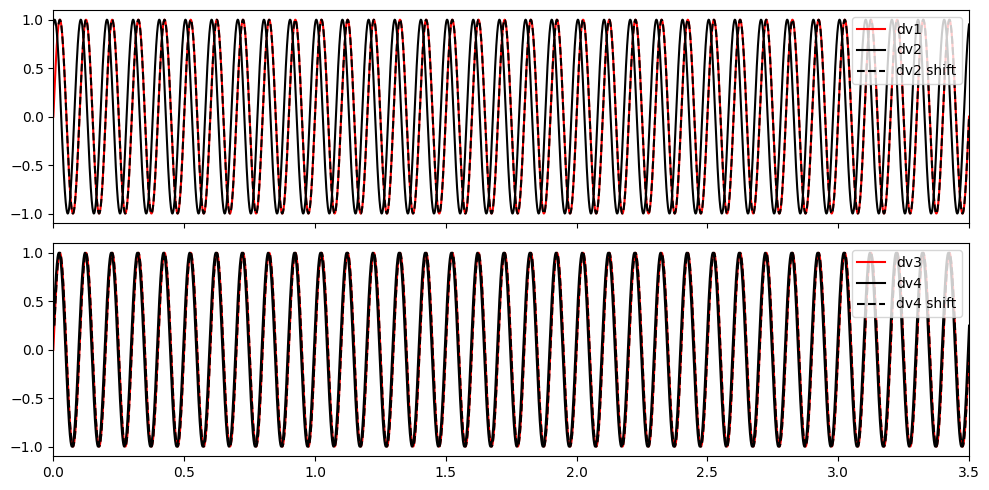

In [9]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 5))

ax[0].plot(X_corr.time, X_corr.wave1, 'r', label='dv1')
ax[0].plot(X_corr.time, X_corr.wave2, 'k', label='dv2')
ax[0].plot(X_corr.time + delay_12, X_corr.wave2, '--k', label='dv2 shift')
ax[0].legend(loc='upper right')

ax[1].plot(X_corr.time, X_corr.wave3, 'r', label='dv3')
ax[1].plot(X_corr.time, X_corr.wave4, 'k', label='dv4')
ax[1].plot(X_corr.time + delay_34, X_corr.wave4, '--k', label='dv4 shift')
ax[1].legend(loc='upper right')
ax[1].set_xlim(0, 3.5)

plt.tight_layout()

In [10]:
X_corr = wtc.cross_correlation(dv1, dv2, dv3, dv4, time)
delays, delay_times = X_corr.n_x_corr(window_size=50000)
dt = X_corr.dt
# Look into why delays don't go from 0 to 3.5

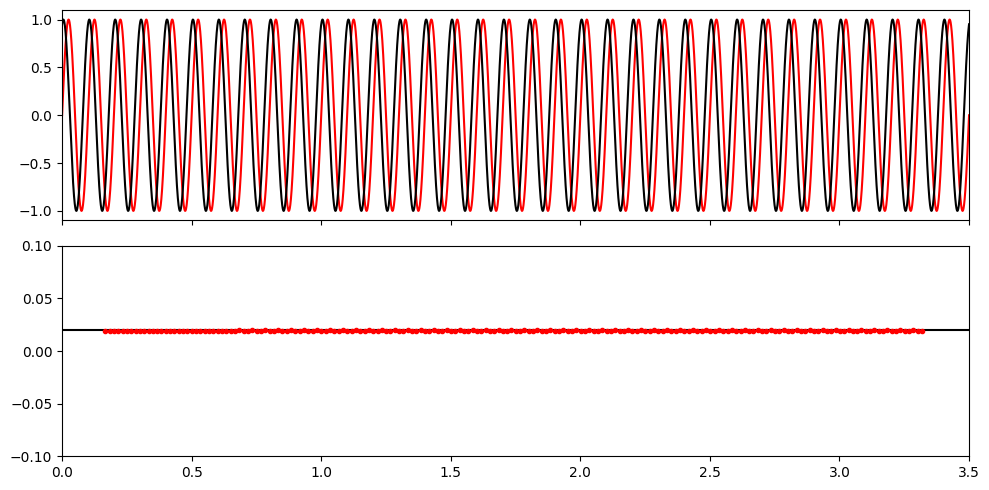

In [11]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 5))
ax[0].plot(time, dv1, 'r')
ax[0].plot(time, dv2, 'k')
ax[1].axhline(v12_actual_delay, c='k')
ax[1].plot(delay_times, delays[:, 0] * dt, 'r.')
ax[1].set_ylim(-0.1, 0.1)
ax[1].set_xlim(0, 3.5)
plt.tight_layout()

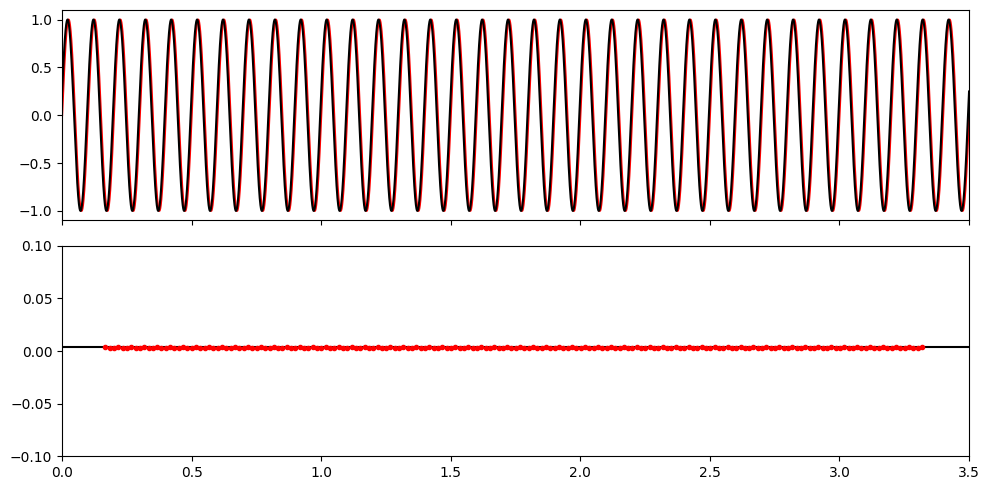

In [12]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 5))
ax[0].plot(time, dv3, 'r')
ax[0].plot(time, dv4, 'k')
ax[1].axhline(v34_actual_delay, c='k')
ax[1].plot(delay_times, delays[:, 1] * dt, 'r.')
ax[1].set_ylim(-0.1, 0.1)
ax[1].set_xlim(0, 3.5)
plt.tight_layout()